<a href="https://colab.research.google.com/github/naffaziy24/clustering-datasetbank/blob/main/ClusteringDatasetBank/UTS_BIG_DATA_CLUSTERING_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns',50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/PEMINATAN DATA/BIG DATA/KELOMPOK 4/UTS/bankdataset.xlsx')

In [ ]:
df

,Date,Domain,Location,Value,Transaction_count
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721
2,2022-01-01,RETAIL,Goa,786941,1573
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049
4,2022-01-01,RESTRAUNT,Madurai,615681,1519
...,...,...,...,...,...
1004475,2022-12-31,INTERNATIONAL,Konark,738557,754
1004476,2022-12-31,INVESTMENTS,Pune,668180,1572
1004477,2022-12-31,RETAIL,Durg,1000349,2155
1004478,2022-12-31,INTERNATIONAL,Mathura,1026547,2458


## Cek Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004480 entries, 0 to 1004479
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Date               1004480 non-null  datetime64[ns]
 1   Domain             1004480 non-null  object        
 2   Location           1004480 non-null  object        
 3   Value              1004480 non-null  int64         
 4   Transaction_count  1004480 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 38.3+ MB


Data memiliki 5 kolom

'Date' tipe data datetime, 'Domain' dan 'Location' tipe data object, 'Value' dan 'Transaction_count' tipe data integer

## Cek Outlier

In [ ]:
# Check for outliers using IQR
Q1 = df[['Value', 'Transaction_count']].quantile(0.25)
Q3 = df[['Value', 'Transaction_count']].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df[['Value', 'Transaction_count']] < (Q1 - 1.5 * IQR)) | (df[['Value', 'Transaction_count']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Number of outliers:", len(outliers))
display(outliers.head())

Number of outliers: 0


,Date,Domain,Location,Value,Transaction_count


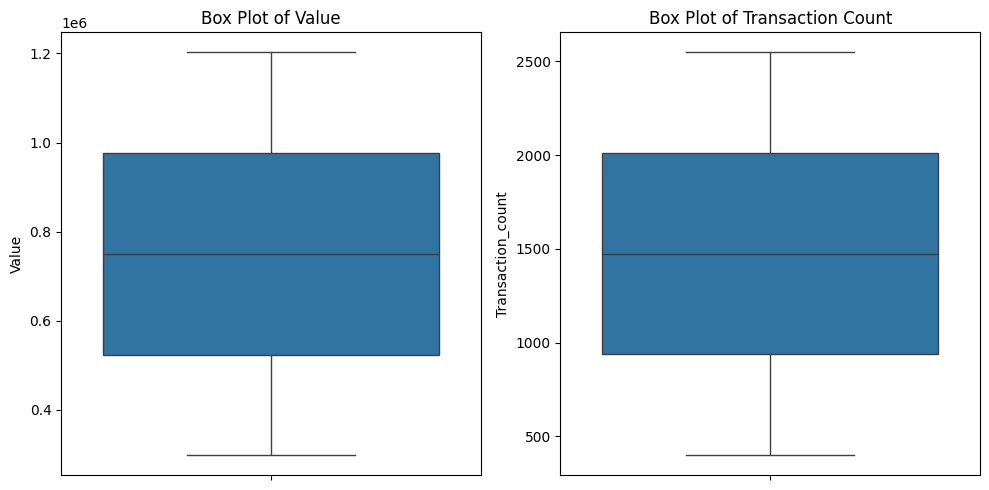

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Transaction_count'])
plt.title('Box Plot of Transaction Count')

plt.tight_layout()
plt.show()

Pada bankdataset ini tidak memiliki nilai menyimpang / outlier

## Cek Duplikat

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print("Number of duplicate rows:", len(duplicate_rows))
display(duplicate_rows.head())

Number of duplicate rows: 0


,Date,Domain,Location,Value,Transaction_count


dataset ini juga tidak memiliki nilai duplikat

# Data Preprocessing

## Subset data

In [ ]:
df_subset = df.head(600000)
display(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               600000 non-null  datetime64[ns]
 1   Domain             600000 non-null  object        
 2   Location           600000 non-null  object        
 3   Value              600000 non-null  int64         
 4   Transaction_count  600000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 22.9+ MB


None

Dikarenakan data memiliki 1 juta rows lebih dan akan berpengaruh ke dalam lama waktu run, kami mengambil 600.000 rows dataset sebagai sampel dalam mini project clustering

## Ukuran Dimensi

In [ ]:
df_subset.shape

(600000, 5)

dataset sisimpan dalam variabel df_subset yang terdiri dari 600.000 rows dan 5 columns

## EDA Deskripsi statistik

In [ ]:
display(df_subset.describe(include='all'))

,Date,Domain,Location,Value,Transaction_count
count,600000,600000,600000,6.000000e+05,600000.000000
unique,NaN,7,46,NaN,NaN
top,NaN,EDUCATION,Goa,NaN,NaN
freq,NaN,86369,13186,NaN,NaN
mean,2022-04-19 12:16:49.152000,NaN,NaN,7.496917e+05,1473.058045
min,2022-01-01 00:00:00,NaN,NaN,2.984230e+05,400.000000
25%,2022-02-24 00:00:00,NaN,NaN,5.233420e+05,936.000000
50%,2022-04-20 00:00:00,NaN,NaN,7.501880e+05,1472.000000
75%,2022-06-13 00:00:00,NaN,NaN,9.753018e+05,2010.000000
max,2022-08-07 00:00:00,NaN,NaN,1.202271e+06,2548.000000


Dataset penelitian terdiri dari 600.000 entri transaksi yang berasal dari berbagai domain dan lokasi. Periode data yang digunakan mencakup tanggal 1 Januari 2022 hingga 7 Agustus 2022, sehingga mampu menggambarkan pola transaksi selama lebih dari tujuh bulan pertama pada tahun 2022.
- Dari sisi kategori transaksi, domain EDUCATION merupakan domain yang paling aktif dengan 88.369 transaksi.
- Dari sisi lokasi geografis, kota Goa menjadi lokasi dengan jumlah transaksi tertinggi yaitu 13.186 entri, area dengan aktivitas transaksi paling aktif dibanding lokasi lainnya.
- Nilai transaksi (Value) memiliki rata-rata sebesar ±749.617, dengan nilai minimum sekitar Rp298.423 dan nilai maksimum mencapai Rp1.202.710.
- variabel Transaction_count, rata-rata jumlah transaksi per entri berada pada kisaran ±1.473 kali, dengan rentang antara 400 hingga 2.548 transaksi.

## Distribusi kolom Value dan Transaction Count

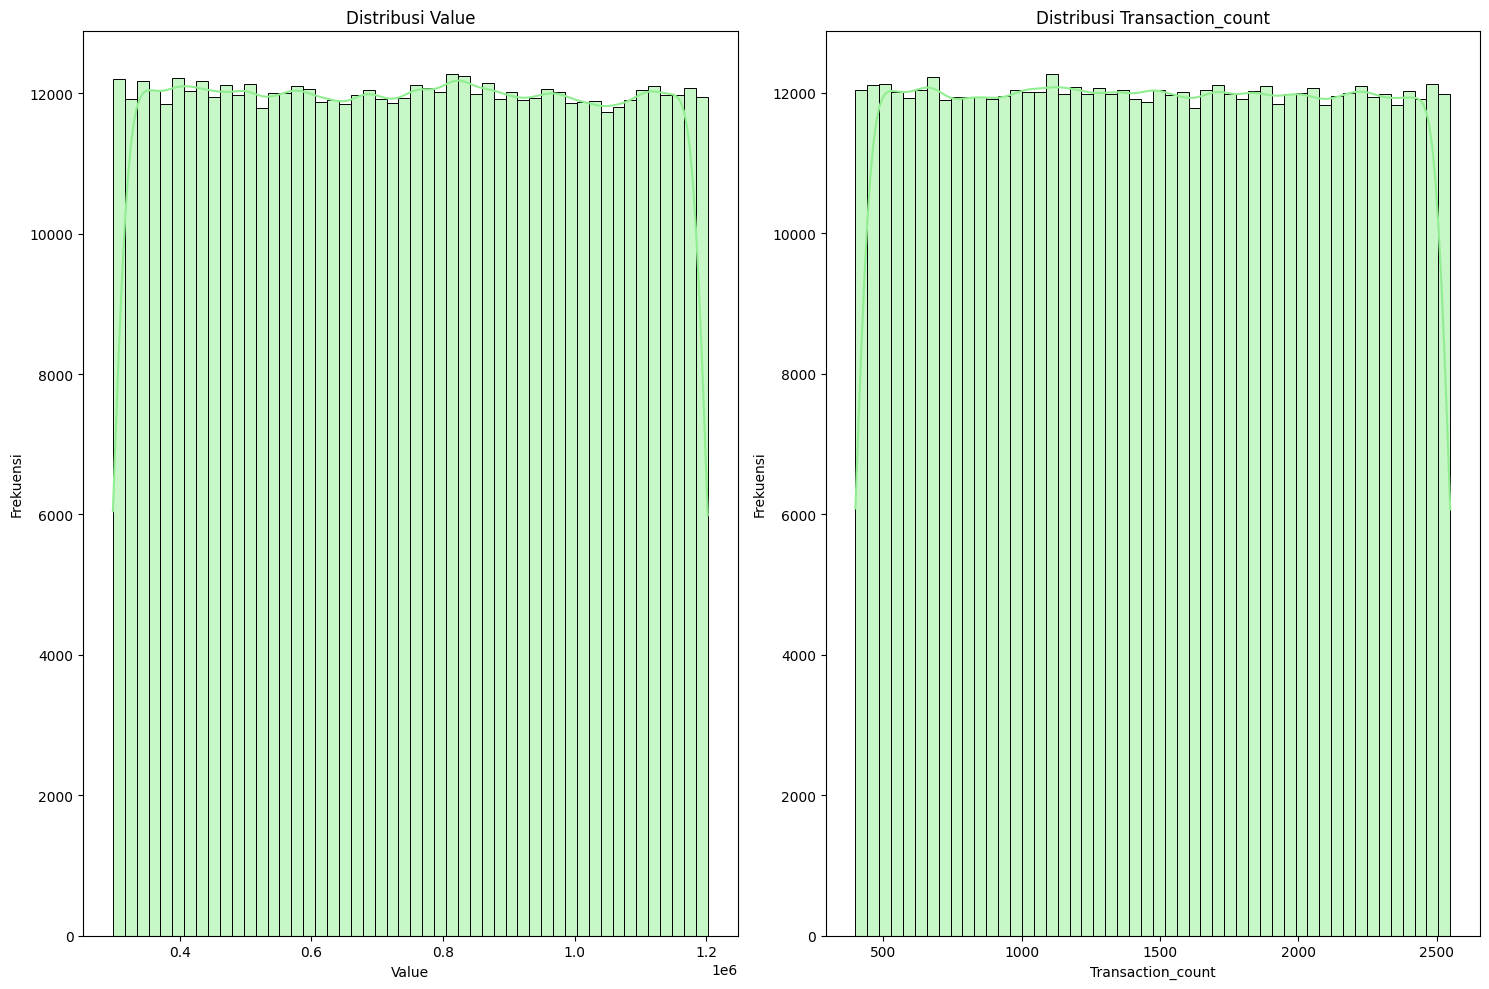

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_subset.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols)+1)//2, 2, i)
    sns.histplot(df_subset[col], bins=50, kde=True, color='lightgreen')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Kedua histogram menunjukkan bahwa sebaran data Value dan Transaction Count relatif merata pada seluruh rentang nilainya. Artinya, tidak terdapat perbedaan yang mencolok, dominasi, ataupun anomali ekstrem pada kedua variabel tersebut. Hal ini menandakan bahwa nilai transaksi maupun jumlah transaksi cenderung konsisten di seluruh data.

## Distribusi Domain

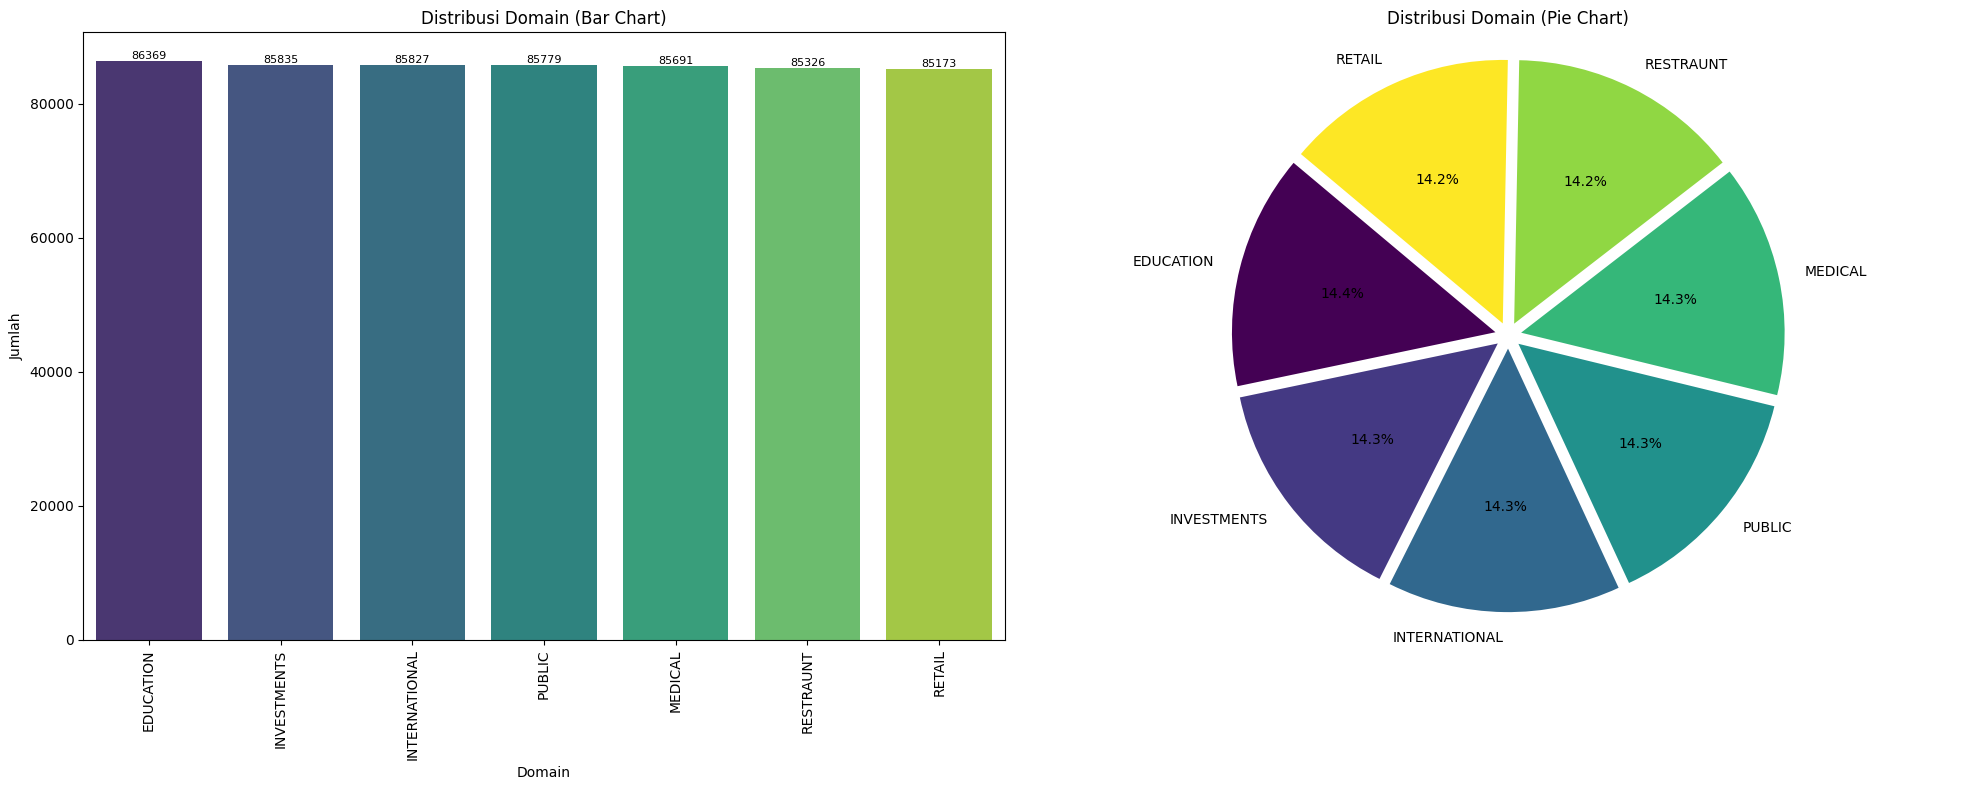

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hitung jumlah tiap domain
domain_counts = df_subset['Domain'].value_counts()
unique_products = len(domain_counts)

# Buat Figure dengan 2 subplot sejajar
fig, axes = plt.subplots(1, 2, figsize=(max(20, unique_products * 0.5), 8))

# ===== Subplot 1: Bar Chart Distribusi Domain =====
sns.countplot(
    x='Domain',
    data=df_subset,
    order=domain_counts.index,
    palette='viridis',
    ax=axes[0]
)

axes[0].set_title('Distribusi Domain (Bar Chart)')
axes[0].set_xlabel('Domain')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=90)

# Tambahkan angka di atas batang
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        int(p.get_height()),
        ha='center', va='bottom', fontsize=8
    )

# ===== Subplot 2: Pie Chart Distribusi Domain =====
explode = [0.05] * len(domain_counts) if len(domain_counts) <= 10 else None

axes[1].pie(
    domain_counts,
    labels=domain_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(np.linspace(0, 1, len(domain_counts))),
    explode=explode
)
axes[1].set_title('Distribusi Domain (Pie Chart)')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


Grafik batang dan pie chart menunjukkan bahwa jumlah data pada setiap domain relatif seimbang. Tidak ada domain yang mendominasi secara signifikan, karena seluruh domain memiliki proporsi yang hampir sama, yaitu berada pada kisaran ±14% dari total data. Pola ini menandakan bahwa aktivitas pada tiap domain terdistribusi merata, sehingga tidak ada bias besar terhadap satu sektor tertentu dalam dataset.

## Distribusi Lokasi

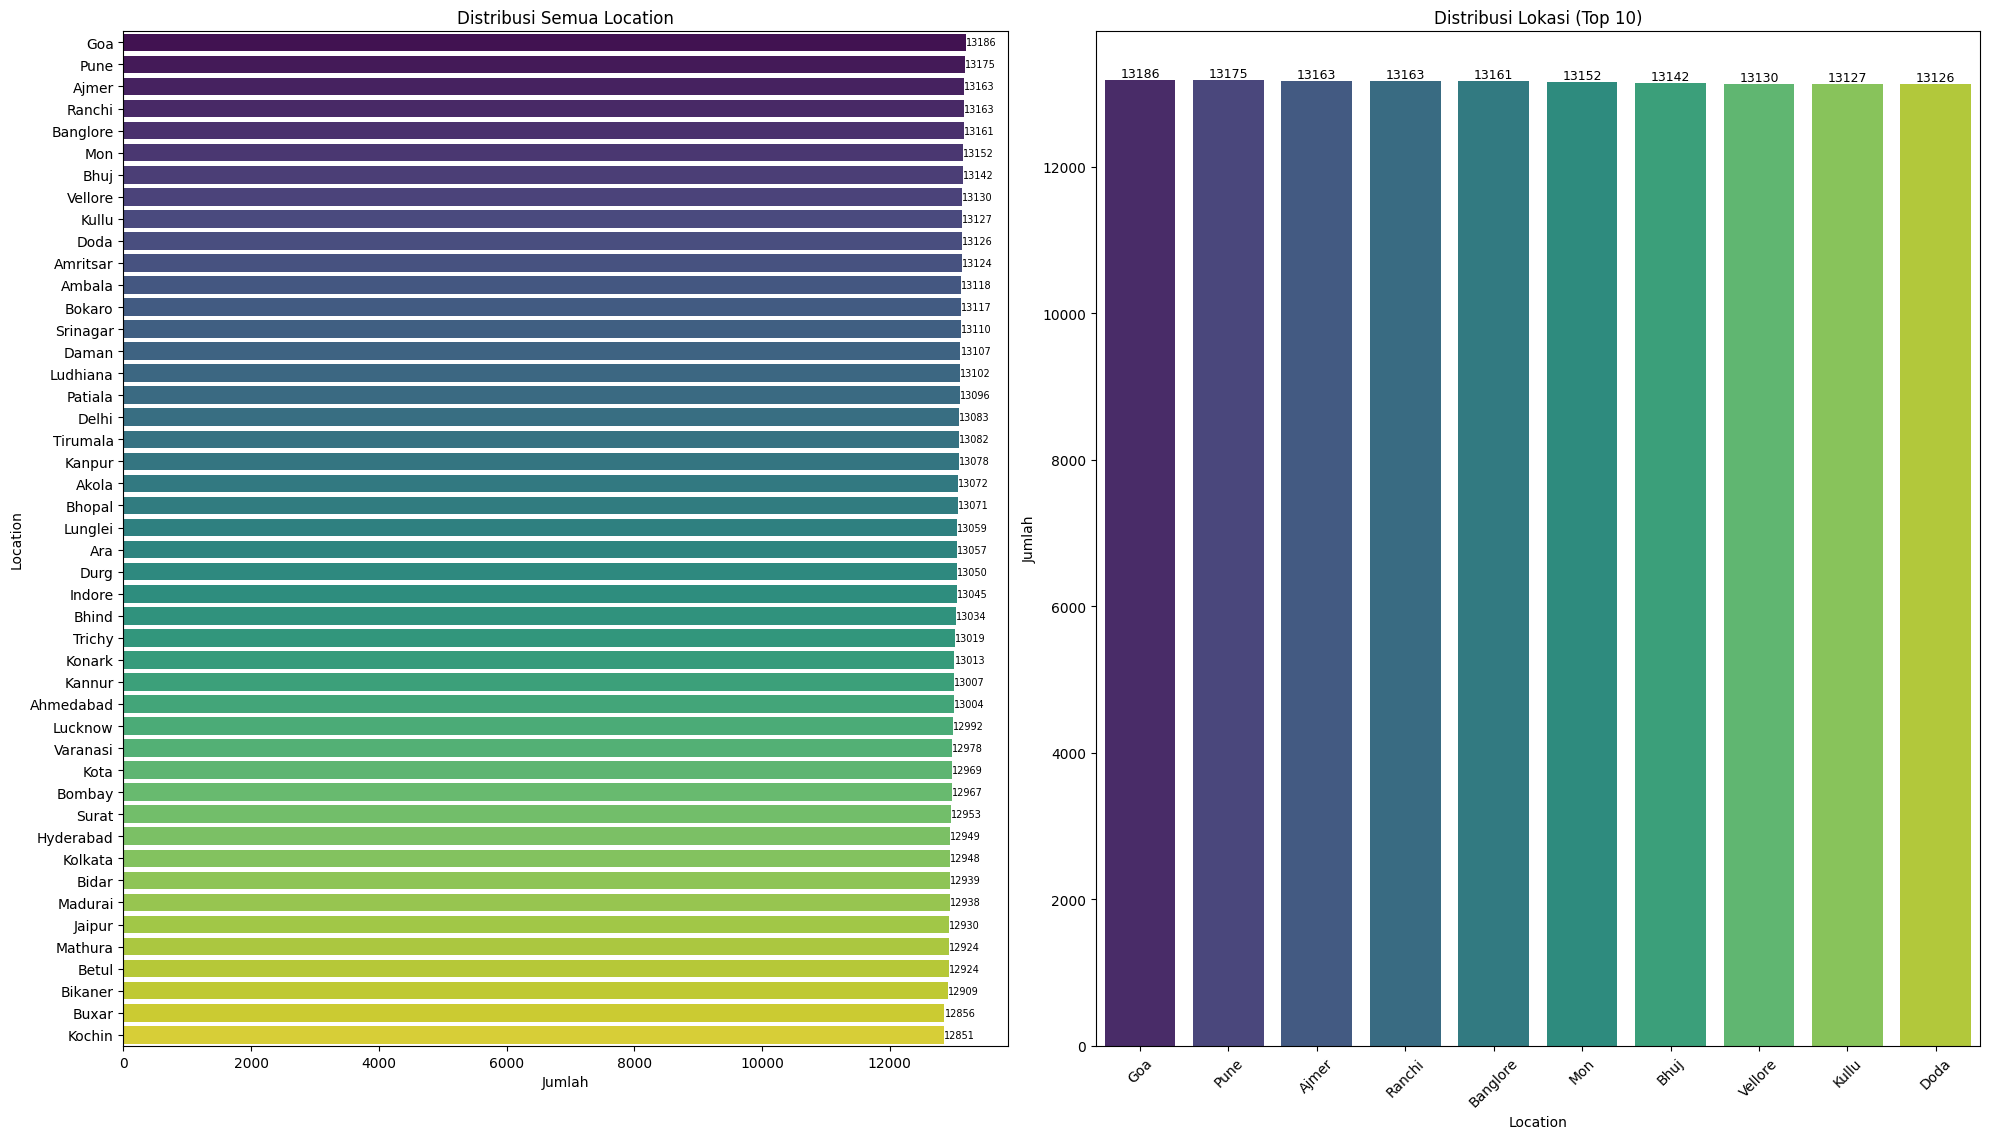

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing lokasi
location_counts = df_subset['Location'].value_counts()

# Ambil hanya 10 lokasi teratas
top_n = 10
top_locations = location_counts.nlargest(top_n)

# Buat 2 subplot dalam 1 baris
fig, axes = plt.subplots(1, 2, figsize=(20, max(6, len(location_counts) * 0.25)))

# ================= Subplot 1: Semua Location =================
sns.barplot(
    y=location_counts.index,
    x=location_counts.values,
    palette='viridis',
    ax=axes[0]
)

axes[0].set_title("Distribusi Semua Location")
axes[0].set_xlabel("Jumlah")
axes[0].set_ylabel("Location")

# Tambahkan label jumlah
for i, v in enumerate(location_counts.values):
    axes[0].text(v + 0.5, i, str(v), va='center', fontsize=7)

# ================= Subplot 2: Top N Location =================
sns.barplot(
    x=top_locations.index,
    y=top_locations.values,
    palette='viridis',
    ax=axes[1]
)

axes[1].set_title(f"Distribusi Lokasi (Top {top_n})")
axes[1].set_xlabel("Location")
axes[1].set_ylabel("Jumlah")
axes[1].tick_params(axis='x', rotation=45)

# Tambahkan label jumlah
for i, v in enumerate(top_locations.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa jumlah data pada setiap lokasi terdistribusi secara merata. Tidak ada lokasi yang memiliki dominasi jumlah data secara signifikan. Meskipun terdapat beberapa lokasi dengan nilai sedikit lebih tinggi, keseluruhan variasinya masih dalam rentang yang sama. Pada visualisasi Top 10 lokasi pun terlihat bahwa perbedaan jumlah antar lokasi sangat kecil.

## Distribusi Data Perbulan

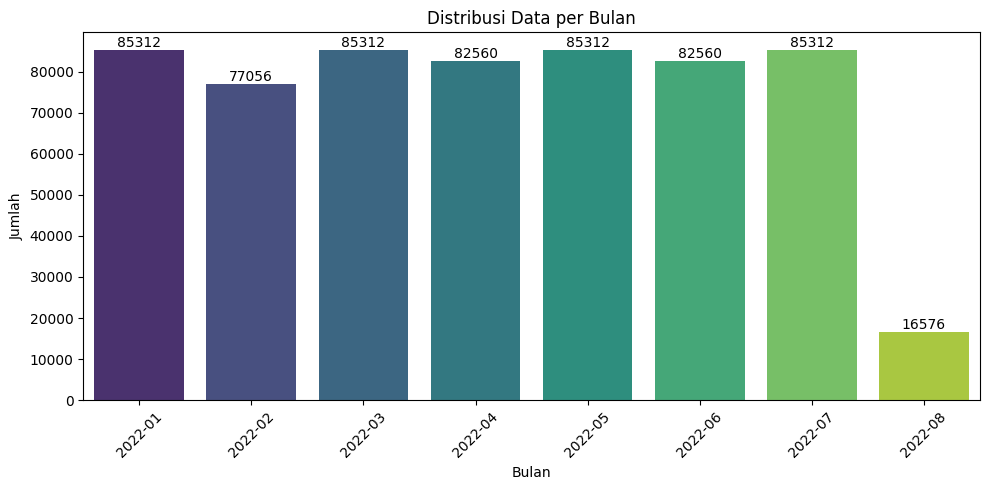

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan kolom Date dalam format datetime
df_subset['Date'] = pd.to_datetime(df_subset['Date'], errors='coerce')

# Agregasi per bulan
df_subset['Month'] = df_subset['Date'].dt.to_period('M')
monthly_counts = df_subset['Month'].value_counts().sort_index()

# Buat plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=monthly_counts.index.astype(str),
    y=monthly_counts.values,
    palette='viridis'
)

# Tambahkan keterangan angka di atas setiap batang
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,    # posisi tengah batang
        p.get_height() + 0.5,             # sedikit di atas batang
        int(p.get_height()),              # nilai jumlah
        ha='center', va='bottom', fontsize=10
    )

# Tambahkan judul dan label
plt.title("Distribusi Data per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribusi data per bulan menunjukkan pola yang relatif stabil dari Januari hingga Juli 2022 dengan kisaran sekitar 82.000–85.000 data setiap bulan. Namun pada bulan Februari terlihat sedikit penurunan, dan penurunan yang sangat signifikan terjadi pada bulan Agustus dengan jumlah data jauh lebih rendah (±16.576). Kondisi ini mengindikasikan bahwa data bulan Agustus tidak lengkap, sehingga tidak representatif untuk analisis tren dan sebaiknya dikecualikan dari tahap analisis yang berhubungan dengan waktu.

## Trend Waktu

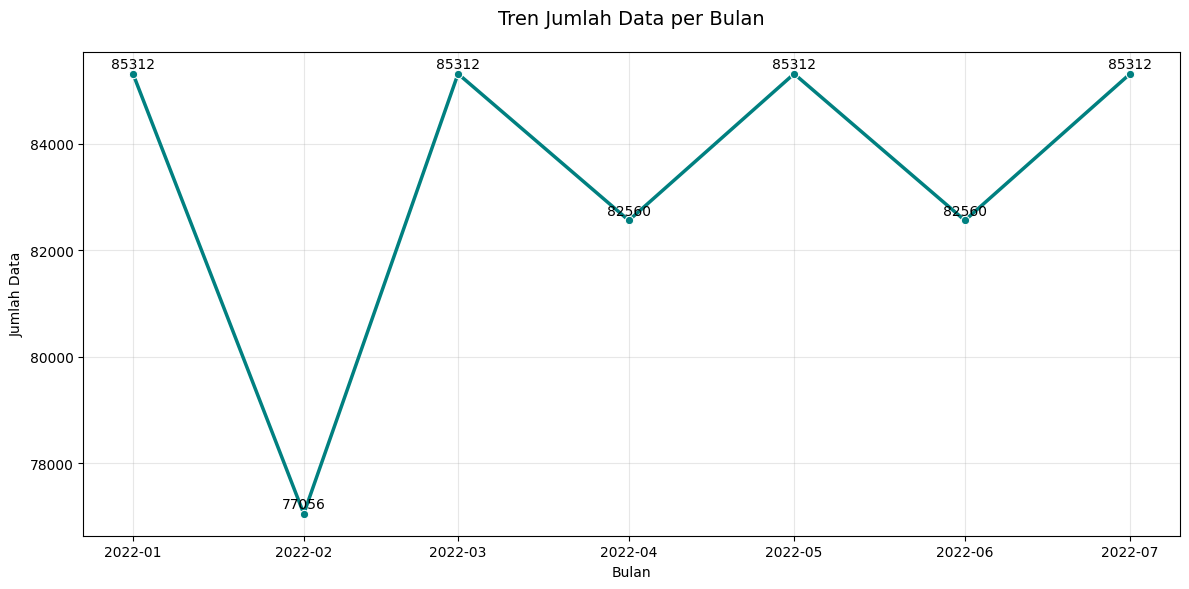

In [ ]:
# Tanpa Agustus
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Copy dataframe agar dataset asli tetap aman
df_analysis = df_subset.copy()

# Pastikan kolom Date terformat dengan benar
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'], errors='coerce')

# Buat kolom Month (YYYY-MM) untuk analisis
df_analysis['Month'] = df_analysis['Date'].dt.to_period('M')

# Hapus data Agustus 2022 saja di DATA ANALISIS
df_analysis = df_analysis[df_analysis['Month'] != '2022-08']

# Hitung jumlah data setiap bulan
monthly_counts = df_analysis['Month'].value_counts().sort_index()

# Convert Period → Timestamp untuk plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', linewidth=2.5, color='teal')

for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y + 100, str(int(y)), ha='center', fontsize=10)

plt.title("Tren Jumlah Data per Bulan", pad=20,fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Data")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa jumlah data per bulan pada periode Januari hingga Juli 2022 cenderung stabil dengan kisaran ±82.000–85.000 data setiap bulan. Penurunan yang cukup tajam terjadi pada bulan Februari dengan jumlah data sekitar 77.056. Setelah itu, jumlah data kembali naik dan stabil pada level ±85.312 di bulan Maret dan Mei hingga Juli. Pola ini menunjukkan bahwa aktivitas data pada dataset relatif konsisten setiap bulannya, dan fluktuasi yang terjadi masih dalam batas wajar.

## Tren jumlah Domain per Bulan

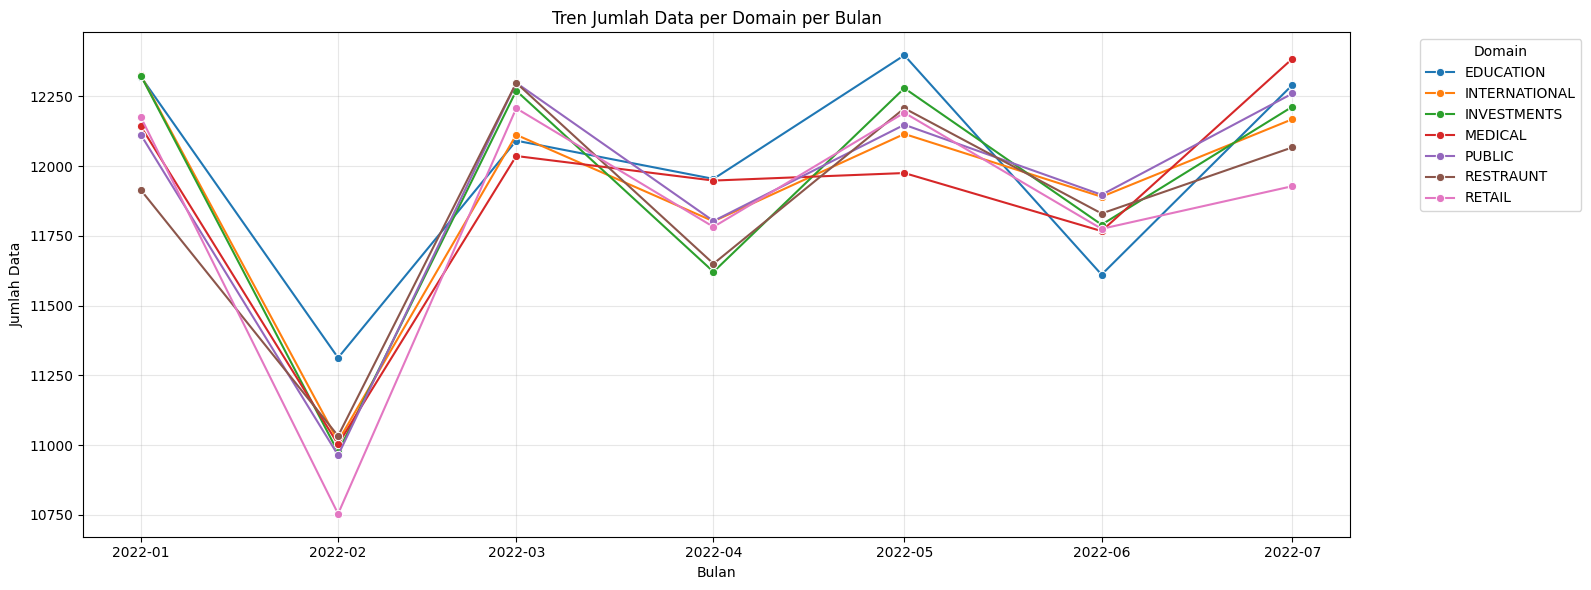

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy df untuk analisis saja
df_analysis = df_subset.copy()

# Pastikan Date dalam format datetime
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'], errors='coerce')

# Buat kolom Month
df_analysis['Month'] = df_analysis['Date'].dt.to_period('M')
df_analysis = df_analysis[df_analysis['Month'] != '2022-08']
trend_domain = df_analysis.groupby(['Month', 'Domain']).size().reset_index(name='Count')

# Pivot untuk visualisasi
trend_pivot = trend_domain.pivot(index='Month', columns='Domain', values='Count').fillna(0)
trend_pivot.index = trend_pivot.index.to_timestamp()
trend_pivot = trend_pivot.sort_index()

# visualisasi
plt.figure(figsize=(16, 6))
sns.lineplot(data=trend_pivot, marker='o', dashes=False )
plt.title("Tren Jumlah Data per Domain per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Data")
plt.grid(True, alpha=0.3)
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Secara keseluruhan, setiap domain menunjukkan trennya masing-masing yang selaras dengan pola keseluruhan jumlah data per bulan. Pola yang konsisten antar domain ini mengindikasikan bahwa faktor musiman atau faktor eksternal tertentu memengaruhi seluruh domain secara bersamaan, sehingga tidak ada domain yang mengalami lonjakan atau penurunan ekstrem yang spesifik hanya pada satu sektor.

## Perbandingan Rata-rata value vs rata-rata transaction count

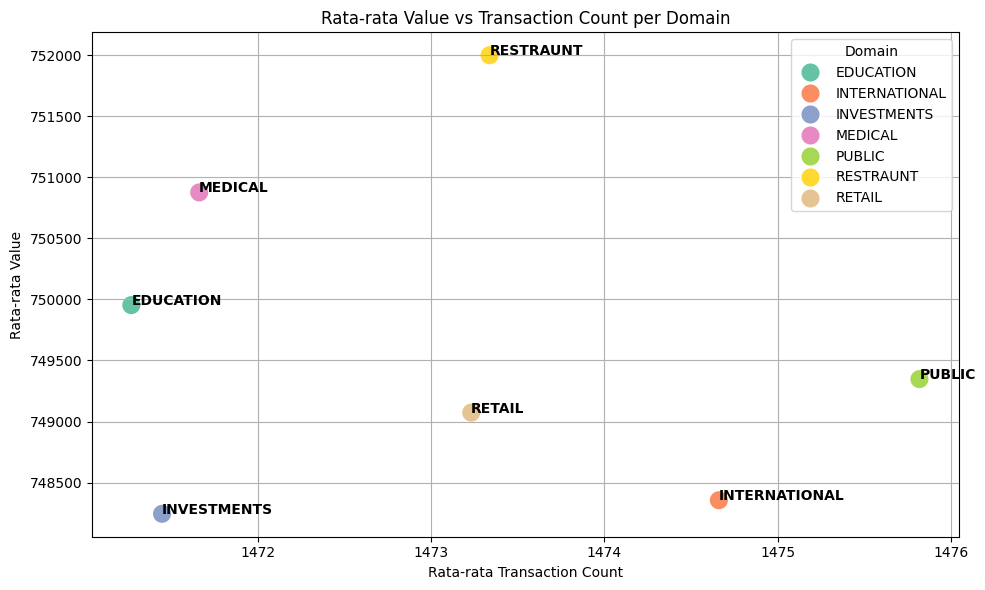

In [ ]:
domain_stats = df_subset.groupby('Domain')[['Value', 'Transaction_count']].mean()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=domain_stats,
    x='Transaction_count',
    y='Value',
    hue=domain_stats.index,
    s=200,
    palette='Set2'
)

for i in domain_stats.index:
    plt.text(
        domain_stats.loc[i,'Transaction_count'],
        domain_stats.loc[i,'Value'],
        i,
        fontsize=10,
        weight='bold'
    )

plt.title("Rata-rata Value vs Transaction Count per Domain")
plt.xlabel("Rata-rata Transaction Count")
plt.ylabel("Rata-rata Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Grafik ini menunjukkan bahwa setiap domain memiliki karakter bisnis yang berbeda berdasarkan rata-rata nilai transaksi (Value) dan rata-rata jumlah transaksi (Transaction Count).
- Domain RESTRAUNT dan MEDICAL memiliki rata-rata value yang lebih tinggi dibandingkan domain lainnya, meskipun jumlah transaksinya tidak paling tinggi. Hal ini mengindikasikan bahwa kedua domain tersebut memiliki tingkat nilai transaksi(value) yang cukup besar pada setiap aktivitasnya.

- domain INTERNATIONAL dan INVESTMENTS memiliki nilai rata-rata value yang relatif lebih rendah dan jumlah transaksi yang lebih sedikit dibanding domain lain, sehingga mengarah pada karakteristik bisnis yang lebih selektif dengan frekuensi aktivitas lebih kecil.

- Domain PUBLIC, EDUCATION, dan RETAIL berada pada posisi menengah dari kedua sisi sehingga menunjukkan pola yang lebih seimbang antara jumlah transaksi dan nilai transaksi.

## Rata-rata Nilai per Transaksi

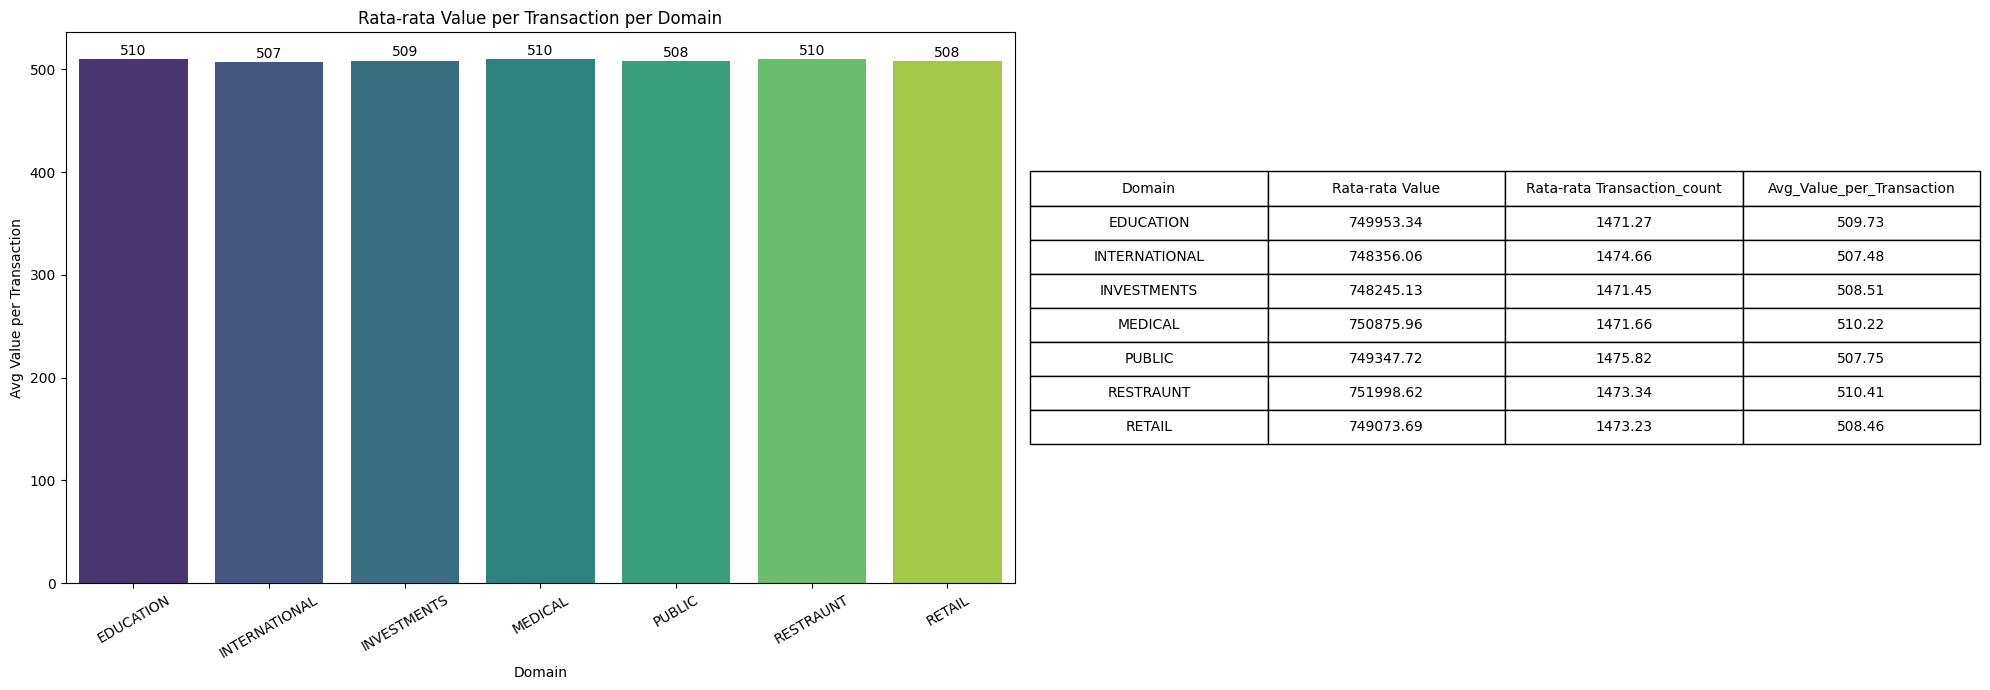

In [ ]:
# Hitung statistik per domain
domain_stats = df_subset.groupby('Domain')[['Value', 'Transaction_count']].mean().reset_index()
domain_stats['Avg_Value_per_Transaction'] = (
    domain_stats['Value'] / domain_stats['Transaction_count']
).round(2)
domain_stats.rename(columns={
    'Value': 'Rata-rata Value',
    'Transaction_count': 'Rata-rata Transaction_count'
}, inplace=True)

# Layout grafik + tabel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Grafik batang
sns.barplot(
    data=domain_stats,
    x='Domain',
    y='Avg_Value_per_Transaction',
    palette='viridis',
    ax=ax1
)

# Tambahkan angka di atas batang (fix)
for p in ax1.patches:
    ax1.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height() + 1),
        ha='center',
        va='bottom',
        fontsize=10
    )

ax1.set_title("Rata-rata Value per Transaction per Domain")
ax1.set_xlabel("Domain")
ax1.set_ylabel("Avg Value per Transaction")
ax1.tick_params(axis='x', rotation=30)

# Tabel di sebelah kanan
ax2.axis('off')
table = ax2.table(
    cellText=domain_stats.round(2).values,
    colLabels=domain_stats.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Jarak antar subplot diperbesar
plt.subplots_adjust(wspace=0.005)

plt.tight_layout()
plt.show()

Hasil analisis menunjukkan bahwa rata-rata nilai transaksi pada seluruh domain berada pada kisaran yang hampir sama, yaitu sekitar 507–510 per transaksi. Perbedaan antar domain sangat kecil sehingga tidak ada sektor yang benar-benar mendominasi dari sisi nilai transaksi per aktivitas. Kondisi ini mengindikasikan bahwa setiap transaksi, apa pun domainnya, memberikan kontribusi nilai yang relatif setara

# Pemilihan Fitur

In [ ]:
features = ["Value", "Transaction_count"]
X = df_subset[features].copy()

In [ ]:
# Tahap Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # bisa diganti MinMaxScaler() kalau mau skala 0-1
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)

# hasil scaling
print("Sebelum Scaling:\n", X.head())
print("\nSetelah Scaling:\n", X_scaled.head())

Sebelum Scaling:
     Value  Transaction_count
0  365554               1932
1  847444               1721
2  786941               1573
3  368610               2049
4  615681               1519

Setelah Scaling:
       Value  Transaction_count
0 -1.471757           0.739682
1  0.374521           0.399611
2  0.142714           0.161078
3 -1.460048           0.928252
4 -0.513439           0.074045


# Modelling


## K-Means

### Penentuan nilai k

#### Elbow Method

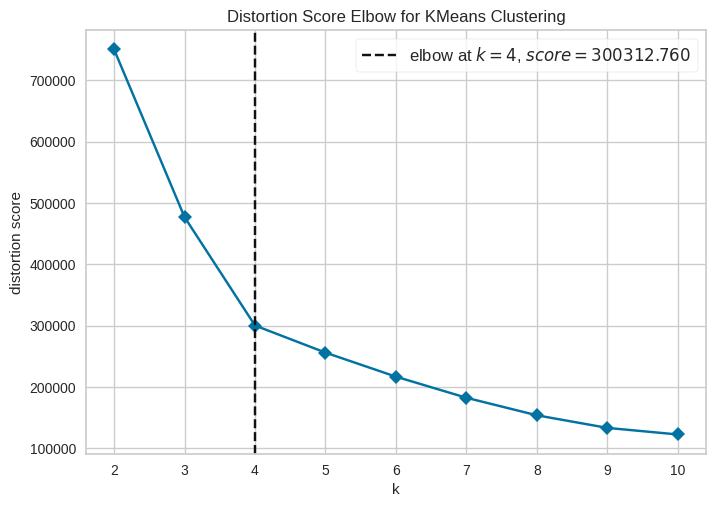

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# --- 1. Buat model KMeans dasar ---
model = KMeans(random_state=42)

# --- 2. Buat visualizer Elbow ---
visualizer = KElbowVisualizer(
    model,
    k=(2, 11),           # range k
    metric='distortion', # atau 'calinski_harabasz' / 'silhouette'
    timings=False
)

# --- 3. Fit dan tampilkan ---
visualizer.fit(X_scaled)
visualizer.show()


Grafik Elbow menunjukkan penurunan nilai distortion score yang cukup tajam dari k=2 hingga k=4, kemudian mulai melandai setelah k=4. Hal ini memperlihatkan bahwa penambahan cluster setelah k=4 tidak lagi memberikan peningkatan signifikan dalam pemisahan data. Dengan demikian, titik siku (elbow) terlihat pada k=4 yang menjadi kandidat jumlah cluster optimal.

#### Davies Bouldin Index

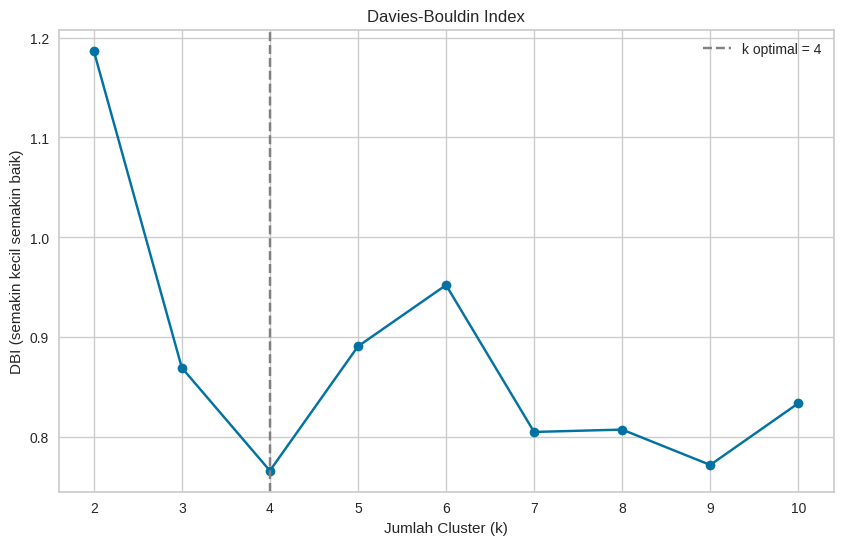

DBI Optimal K: 4


In [ ]:
from sklearn.metrics import davies_bouldin_score

def dbi_visualizer(X, k_range=(2,11)):
    k_values = range(k_range[0], k_range[1])
    dbi_scores = []

    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        dbi_scores.append(davies_bouldin_score(X, model.labels_))

    k_opt = k_values[np.argmin(dbi_scores)]

    plt.figure(figsize=(10,6))
    plt.plot(k_values, dbi_scores, marker='o')
    plt.axvline(k_opt, linestyle='--', color='grey', label=f"k optimal = {k_opt}")

    plt.title("Davies-Bouldin Index")
    plt.xlabel("Jumlah Cluster (k)")
    plt.ylabel("DBI (semakin kecil semakin baik)")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"DBI Optimal K: {k_opt}")

dbi_visualizer(X_scaled)


Grafik DBI menunjukkan nilai paling rendah pada k=4, yang berarti struktur cluster pada k=4 memiliki pemisahan yang lebih baik dan intra-cluster similarity yang lebih kompak dibandingkan nilai k lainnya. Semakin rendah nilai DBI maka semakin baik kualitas cluster.

Kesimpulan :

Berdasarkan hasil evaluasi menggunakan Elbow Method dan Davies-Bouldin Index, diperoleh bahwa jumlah cluster optimal adalah k = 4. Pemilihan nilai ini memberikan keseimbangan yang baik antara pemisahan cluster dan kompleksitas model, sehingga dipilih untuk tahap analisis clustering selanjutnya.

### Clustering K-Means

In [ ]:
from sklearn.cluster import KMeans

# Buat model
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df_subset['cluster'] = cluster_labels

# Tampilkan jumlah anggota tiap cluster
print(df_subset['cluster'].value_counts())


cluster
2    150993
3    150718
1    149773
0    148516
Name: count, dtype: int64


Keempat cluster memiliki ukuran yang hampir sama sehingga segmentasi data bersifat proporsional. Ini menunjukkan bahwa data memiliki distribusi yang baik dan tidak ada cluster dominan.

### Visualisasi Hasil K-Means

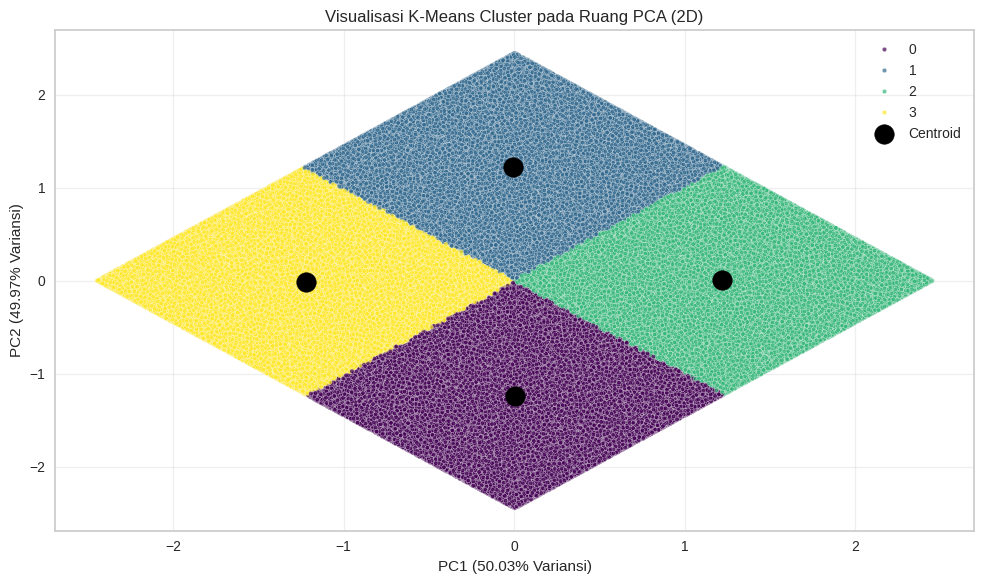

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA ke 2 dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_subset['cluster'],
    palette='viridis',
    s=10,
    alpha=0.7,
    legend='full'
)

# Tambahkan centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    s=200,
    marker='o',
    edgecolor='black',
    label='Centroid'
)

plt.title("Visualisasi K-Means Cluster pada Ruang PCA (2D)")
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100,2)}% Variansi)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100,2)}% Variansi)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Tingkat variansi yang hampir simetris antara PC1 dan PC2 mengindikasikan bahwa kedua komponen utama berkontribusi hampir sama dalam menjelaskan pola data. Kondisi ini juga menunjukkan bahwa hasil clustering tidak didominasi hanya oleh satu dimensi saja, sehingga segmentasi dapat dianggap representatif terhadap keseluruhan fitur data.

### Karakteristik Clustering K-Means

In [ ]:
# Hitung rata-rata setiap fitur numerik per cluster
cluster_profile = df_subset.groupby('cluster')[['Value', 'Transaction_count']].mean().round(2)

# Tambahkan juga ukuran cluster
cluster_profile['Jumlah Anggota'] = df_subset['cluster'].value_counts().sort_index()

cluster_profile


,Value,Transaction_count,Jumlah Anggota
cluster,,,
0,523359.18,2015.44,148516
1,974728.49,932.29,149773
2,975477.91,2007.00,150993
3,522893.33,941.07,150718


Berdasarkan hasil perhitungan rata-rata variabel Value dan Transaction_count pada setiap cluster, diperoleh empat segmen dengan karakteristik yang berbeda :    
- Cluster 2 merupakan segmen paling **potensial** karena memiliki nilai dan frekuensi transaksi tinggi.
- Cluster 1 mewakili segmen **premium** dengan nilai transaksi yang besar namun frekuensinya transaksi rendah.
- Cluster 0 memiliki jumlah transaksi tinggi namun nilainya tidak sebesar cluster premium, sehingga segmen ini tetap penting dari sisi aktivitas.  
- Cluster 3 menunjukkan segmen dengan kontribusi paling rendah baik dari sisi nilai maupun frekuensi transaksi sehingga memerlukan pendekatan pengembangan khusus.

Distribusi anggota yang relatif merata pada setiap cluster menunjukkan bahwa segmentasi cukup seimbang.

In [ ]:
df_subset

,Date,Domain,Location,Value,Transaction_count,cluster
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932,0
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721,2
2,2022-01-01,RETAIL,Goa,786941,1573,2
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049,0
4,2022-01-01,RESTRAUNT,Madurai,615681,1519,0
...,...,...,...,...,...,...
599995,2022-08-07,MEDICAL,Tirumala,807880,1644,2
599996,2022-08-07,RESTRAUNT,Ara,1035374,2396,2
599997,2022-08-07,RESTRAUNT,Tirumala,977554,687,1
599998,2022-08-07,EDUCATION,Surat,677839,1804,0


# Visualisasi Distribusi Jumlah Data Tiap Cluster

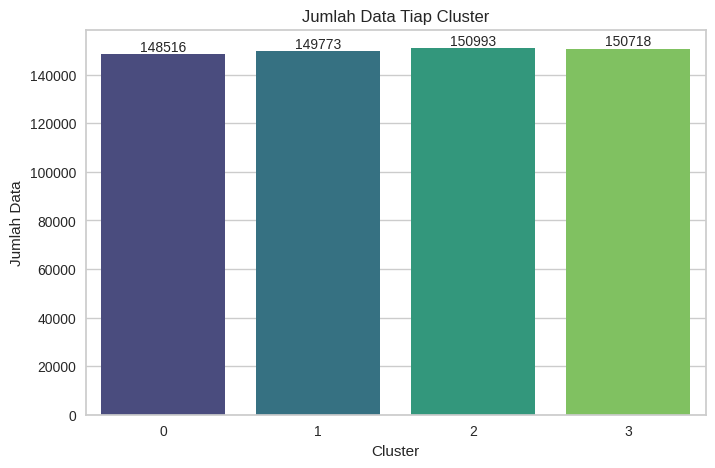

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='cluster', data=df_subset, palette='viridis') # Menggunakan palet 'viridis'

plt.title('Jumlah Data Tiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')

# Menambahkan keterangan angka di atas setiap bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posisi x (tengah bar)
        p.get_height(),                  # Posisi y (ujung atas bar)
        '{:.0f}'.format(p.get_height()), # Format angka (tanpa desimal)
        ha='center', va='bottom',        # Penjajaran teks
        fontsize=10
    )

plt.show()

# Visualisasi Rata-rata Fitur per cluster

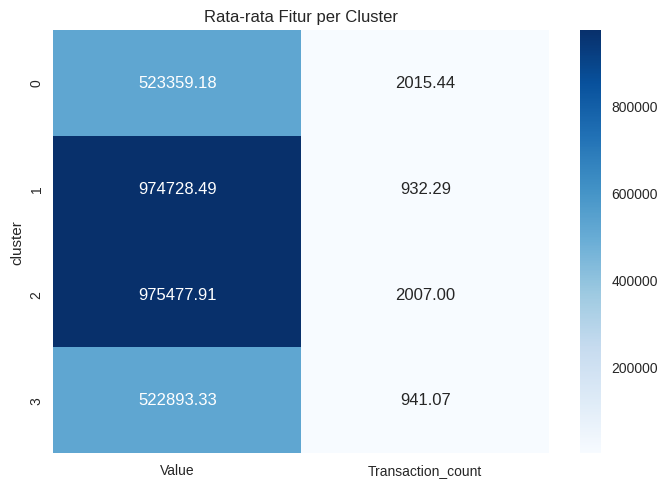

In [ ]:
cluster_summary = df_subset.groupby('cluster')[['Value', 'Transaction_count']].mean()
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap='Blues')
plt.title('Rata-rata Fitur per Cluster')
plt.show()


# Visualisasi Distribusi Domain tiap Cluster

Distribusi Domain pada Setiap Cluster:


cluster,0,1,2,3
Domain,,,,
EDUCATION,21267,21633,21717,21752
INTERNATIONAL,21403,21391,21511,21522
INVESTMENTS,21267,21346,21327,21895
MEDICAL,21212,21405,21634,21440
PUBLIC,21394,21439,21614,21332
RESTRAUNT,20919,21452,21636,21319
RETAIL,21054,21107,21554,21458


Persentase Distribusi Domain per Cluster (%):


cluster,0,1,2,3
Domain,,,,
EDUCATION,14.32,14.44,14.38,14.43
INTERNATIONAL,14.41,14.28,14.25,14.28
INVESTMENTS,14.32,14.25,14.12,14.53
MEDICAL,14.28,14.29,14.33,14.23
PUBLIC,14.41,14.31,14.31,14.15
RESTRAUNT,14.09,14.32,14.33,14.14
RETAIL,14.18,14.09,14.27,14.24


<Figure size 1200x600 with 0 Axes>

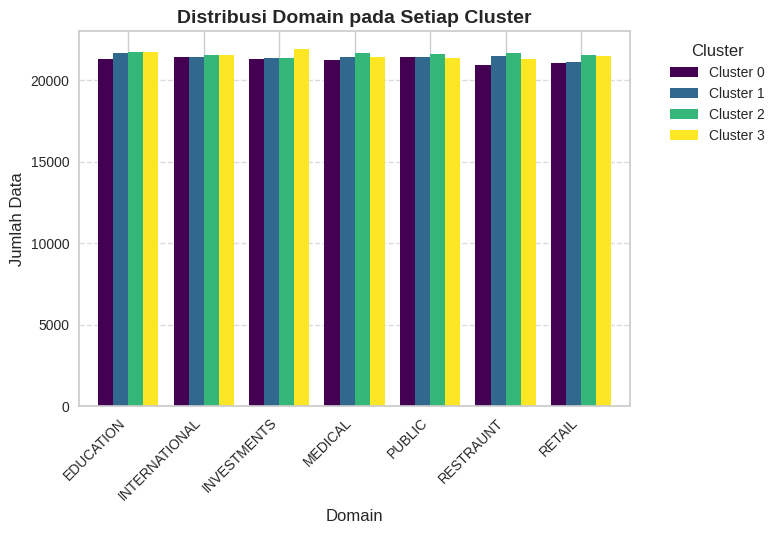

In [ ]:
# Hitung distribusi domain di setiap cluster (tabel)
domain_cluster = pd.crosstab(df_subset['Domain'], df_subset['cluster'])
print("Distribusi Domain pada Setiap Cluster:")
display(domain_cluster)

# Hitung persentase agar lebih mudah dibaca
domain_cluster_pct = domain_cluster.apply(lambda x: round(100 * x / x.sum(), 2))
print("Persentase Distribusi Domain per Cluster (%):")
display(domain_cluster_pct)

# Ubah nama kolom cluster agar lebih informatif
domain_cluster.columns = [f'Cluster {i}' for i in domain_cluster.columns]

# Visualisasi distribusi domain per cluster
plt.figure(figsize=(12,6))
domain_cluster.plot(kind='bar', colormap='viridis', width=0.8)

plt.title('Distribusi Domain pada Setiap Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


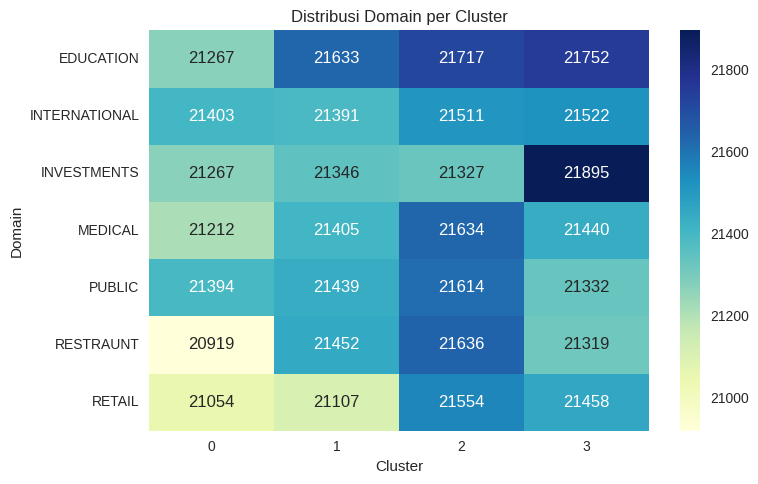

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(domain_cluster, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribusi Domain per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# DBSCAN

### Penentuan Neighbors

#### K-Distance Graph (Nearest Neighbors)

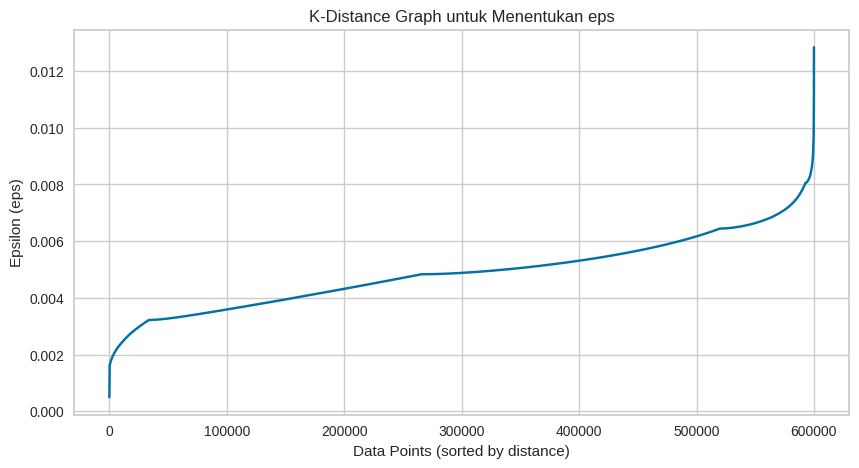

In [ ]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Gunakan 5 tetangga (umum digunakan)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Urutkan jarak dan buat grafik
distances = np.sort(distances[:, 4])  # kolom ke-4 karena n_neighbors=5
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title("K-Distance Graph untuk Menentukan eps")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel("Epsilon (eps)")
plt.grid(True)
plt.show()


### Clustering DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Inisialisasi dan fit model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Simpan hasil label cluster ke DataFrame
df_subset['Cluster'] = dbscan.labels_

# Lihat ringkasan hasil
print(df_subset['Cluster'].value_counts())



### Visualisasi Hasil DBSCAN

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled['Value'],
    y=X_scaled['Transaction_count'],
    hue=df_subset['Cluster'],
    palette='tab10',
    s=60
)
plt.title("Hasil Clustering DBSCAN")
plt.xlabel("Value (Scaled)")
plt.ylabel("Transaction Count (Scaled)")
plt.legend(title="Cluster")
plt.show()